In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *


In [3]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 10.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_gamma_11_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True


(40401, 1, 2)


In [4]:
Net = additive_net.Net
Generator = gamma_11_generator.Generator
clip_op_lambda = (lambda x: clip_op_gamma_01(x))
Trainer = trainer.Trainer


In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)


2025-11-09 07:25:28,922:INFO:TEST BATCH-0: t = 0.0017, Revenue: 1.343025, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,923:INFO:TEST BATCH-1: t = 0.0029, Revenue: 1.350887, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,925:INFO:TEST BATCH-2: t = 0.0041, Revenue: 1.358790, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,926:INFO:TEST BATCH-3: t = 0.0052, Revenue: 1.366732, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,928:INFO:TEST BATCH-4: t = 0.0064, Revenue: 1.374712, Regret: 0.000001, IRP: 0.000000
2025-11-09 07:25:28,929:INFO:TEST BATCH-5: t = 0.0075, Revenue: 1.382727, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,930:INFO:TEST BATCH-6: t = 0.0085, Revenue: 1.390776, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,932:INFO:TEST BATCH-7: t = 0.0101, Revenue: 1.398857, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,934:INFO:TEST BATCH-8: t = 0.0114, Revenue: 1.406967, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:25:28,935:INFO:TEST BATCH-9: t =

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)


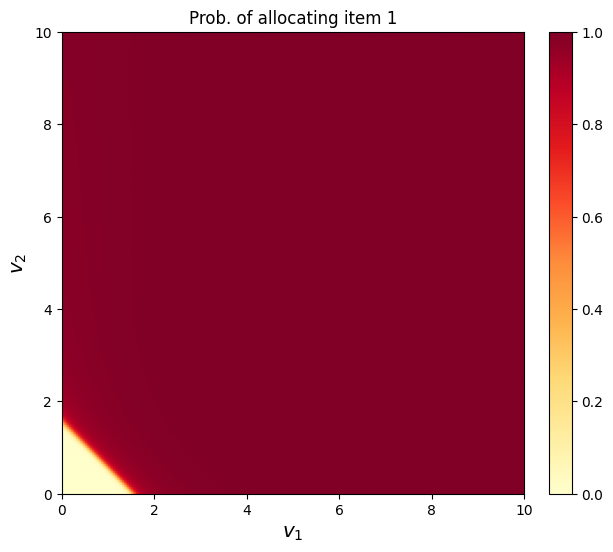

In [6]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0,10,0,10], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)


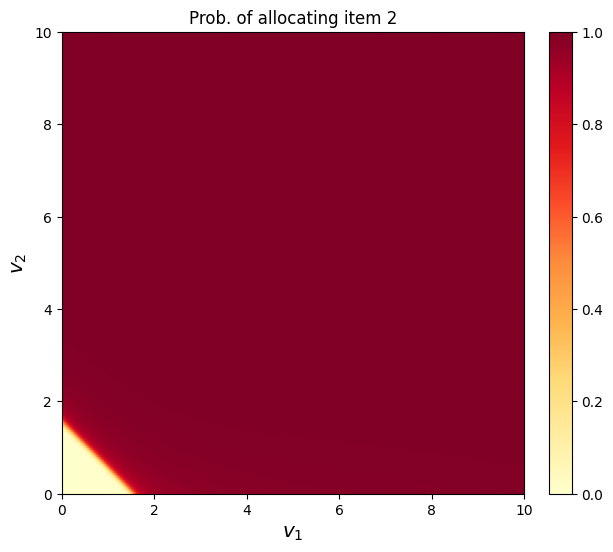

In [7]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0,10,0,10], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)


In [12]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 2.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_gamma_11_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [13]:
Net = additive_net.Net
Generator = gamma_11_generator.Generator
clip_op_lambda = (lambda x: clip_op_gamma_01(x))
Trainer = trainer.Trainer

In [14]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

2025-11-09 07:49:00,231:INFO:TEST BATCH-0: t = 0.0020, Revenue: 0.344889, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,233:INFO:TEST BATCH-1: t = 0.0035, Revenue: 0.351970, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,235:INFO:TEST BATCH-2: t = 0.0052, Revenue: 0.359067, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,238:INFO:TEST BATCH-3: t = 0.0068, Revenue: 0.366178, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,239:INFO:TEST BATCH-4: t = 0.0082, Revenue: 0.373303, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,241:INFO:TEST BATCH-5: t = 0.0095, Revenue: 0.380443, Regret: 0.000004, IRP: 0.000000
2025-11-09 07:49:00,243:INFO:TEST BATCH-6: t = 0.0110, Revenue: 0.387597, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,246:INFO:TEST BATCH-7: t = 0.0138, Revenue: 0.394764, Regret: 0.000004, IRP: 0.000000
2025-11-09 07:49:00,249:INFO:TEST BATCH-8: t = 0.0163, Revenue: 0.401945, Regret: 0.000000, IRP: 0.000000
2025-11-09 07:49:00,252:INFO:TEST BATCH-9: t =

In [15]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

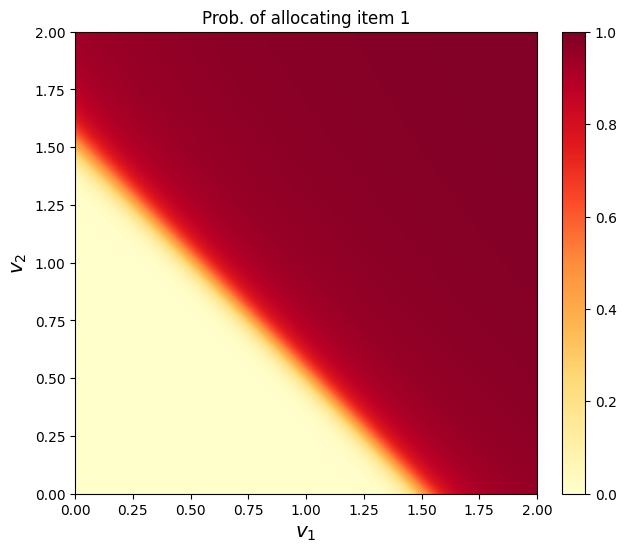

In [18]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0,2,0,2], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

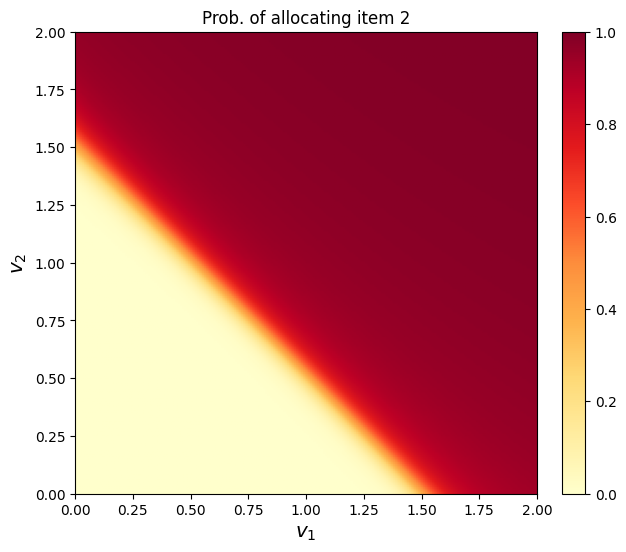

In [16]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0,2,0,2], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)